# Numpy: Different way initializing 2D arrays, different matrix results 

In [2]:
import numpy as np

arr_2x1 = np.array([[200, 17]])
arr_1x2 = np.array([[201],
                    [18]])

You can imagine: 

In [3]:
arr_2x1_clearly = np.array([[200, 17],  # this is the first row(1D array) in 2D array
                            [0, 0]])    # this is the second row


When creating a 2x1 array in Python using NumPy, you can represent it as follows:
```python
arr_2x1_clearly = np.array(
    [[200, 17],
    [0, 0]]
)
```

- This array can be visualized in matrix form as:

$$
\begin{bmatrix}
200 & 17 \\
- & - 
\end{bmatrix}
\begin{array}{l}
\leftarrow \text{ arr 2D[0] } \\
\leftarrow \text{ ... }
\end{array}
$$

And 

$$
\begin{array}{cc}
\begin{bmatrix}
200 & 17 \\
- & - 
\end{bmatrix} \\[10pt]
\phantom{0000} \uparrow \\
\phantom{00} \text{arr 2D[0][1]}
\end{array}
$$

&rarr; 200 and 17 are in the same column (in 1D array)

In [4]:
arr_1x2_clearly = np.array([[201, 0],    
                            [18, 0]])

When creating a 1x2 array in Python using NumPy, you can represent it as follows:
```python
arr_2x1_clearly = np.array(
    [[201, 0],
    [18, 0]]
)
```

- This array can be visualized in matrix form as:


$$
\begin{array}{cc}
\begin{bmatrix}
201 & \quad & - \\
18 & \quad & - 
\end{bmatrix} \\[10pt]
\uparrow \quad \quad \quad \quad \uparrow \quad\\
\text{first 1D arr | } \text{ second 1D arr} 
\end{array}
$$

&rarr; 201 and 18 are in the different columns 

In [5]:
print(arr_2x1[0][1])    # in the first row, get the value at second column
print(arr_1x2[1][0])    # in the second row, get the value at first column

17
18


### The end

---
- Universal Approximation Theorem:
> Một neural network với 1 hidden layer và activation phi tuyến (sigmoid, ReLU, tanh) có thể xấp xỉ bất kỳ hàm liên tục nào trên tập compact, với độ chính xác tùy ý, miễn là có đủ neurons.

Logistic Regression Accuracy: 0.8600
Neural Network Accuracy: 0.9800


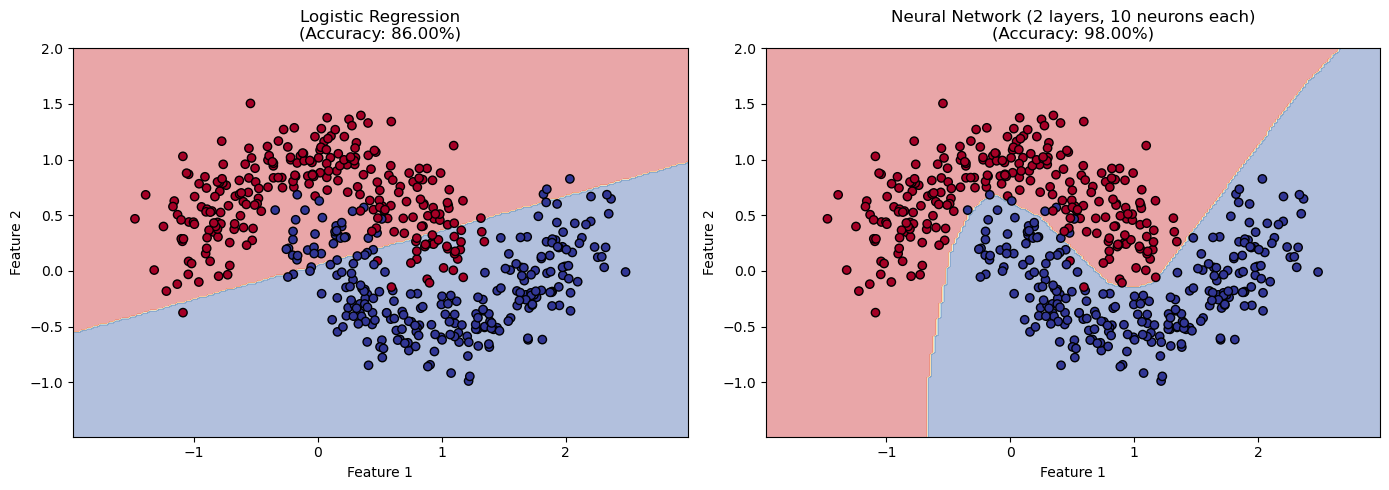

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Tạo dữ liệu phi tuyến (hình bán nguyệt)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)

# 2. Neural Network
nn = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
nn_score = nn.score(X_test, y_test)

print(f"Logistic Regression Accuracy: {log_reg_score:.4f}")
print(f"Neural Network Accuracy: {nn_score:.4f}")

# Vẽ decision boundary
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='black')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plot_decision_boundary(log_reg, X, y, axes[0], 
                       f'Logistic Regression\n(Accuracy: {log_reg_score:.2%})')
plot_decision_boundary(nn, X, y, axes[1], 
                       f'Neural Network (2 layers, 10 neurons each)\n(Accuracy: {nn_score:.2%})')

plt.tight_layout()
plt.savefig('nn_vs_logistic.png', dpi=150)
plt.show()

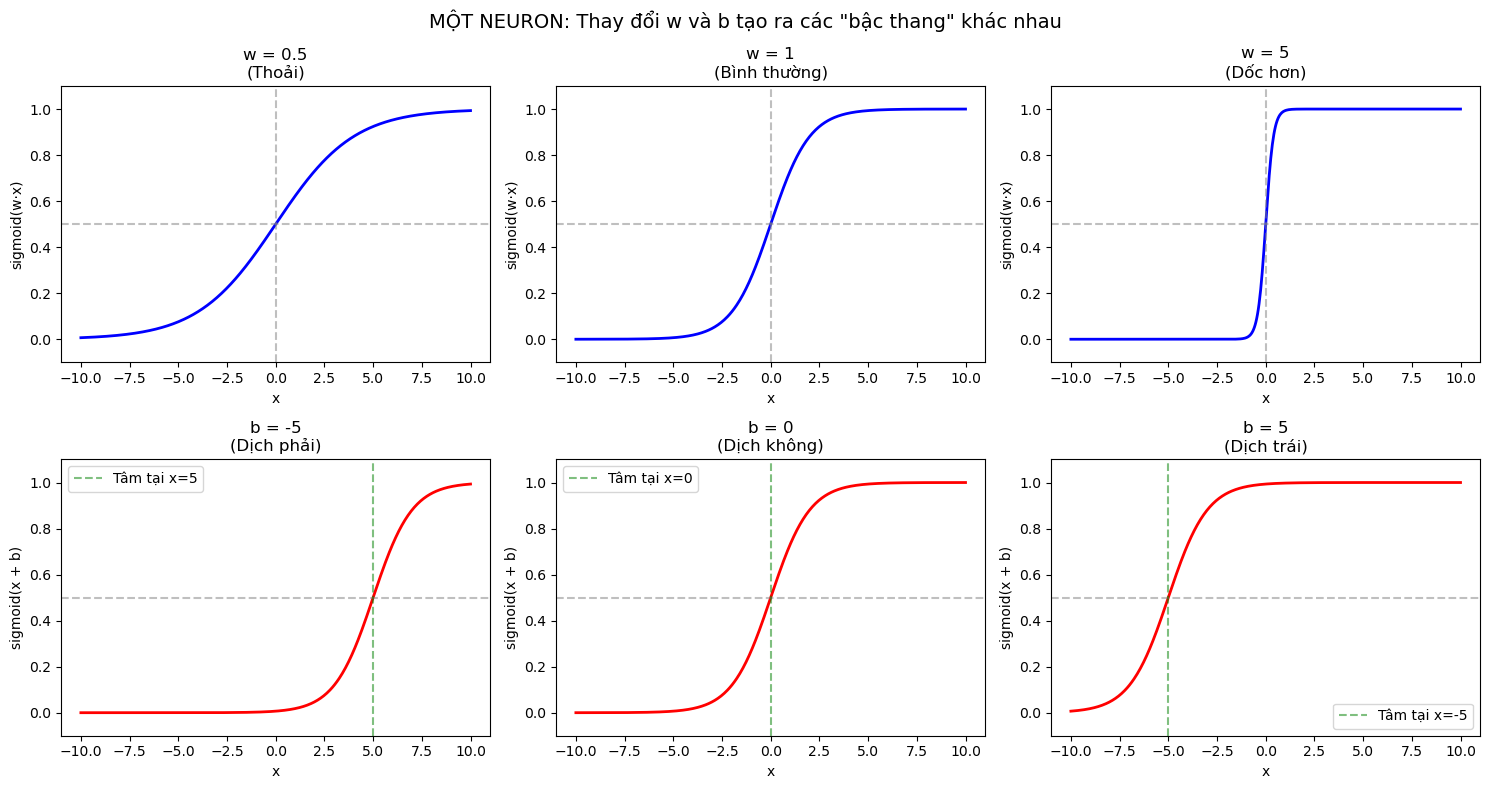

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# PHẦN 1: MỘT NEURON VỚI SIGMOID TẠO RA "BẬC THANG"
# ============================================================

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 500)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Thay đổi weight w → thay đổi độ dốc
weights = [0.5, 1, 5]
for i, w in enumerate(weights):
    z = w * x
    y = sigmoid(z)
    axes[0, i].plot(x, y, 'b-', linewidth=2)
    axes[0, i].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    axes[0, i].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    axes[0, i].set_title(f'w = {w}\n({"Thoải" if w < 1 else "Dốc hơn" if w > 1 else "Bình thường"})')
    axes[0, i].set_xlabel('x')
    axes[0, i].set_ylabel('sigmoid(w·x)')
    axes[0, i].set_ylim(-0.1, 1.1)

# Thay đổi bias b → dịch chuyển vị trí
biases = [-5, 0, 5]
for i, b in enumerate(biases):
    z = x + b
    y = sigmoid(z)
    axes[1, i].plot(x, y, 'r-', linewidth=2)
    axes[1, i].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    axes[1, i].axvline(x=-b, color='green', linestyle='--', alpha=0.5, label=f'Tâm tại x={-b}')
    axes[1, i].set_title(f'b = {b}\n(Dịch {"trái" if b > 0 else "phải" if b < 0 else "không"})')
    axes[1, i].set_xlabel('x')
    axes[1, i].set_ylabel('sigmoid(x + b)')
    axes[1, i].set_ylim(-0.1, 1.1)
    axes[1, i].legend()

plt.suptitle('MỘT NEURON: Thay đổi w và b tạo ra các "bậc thang" khác nhau', fontsize=14)
plt.tight_layout()
plt.show()

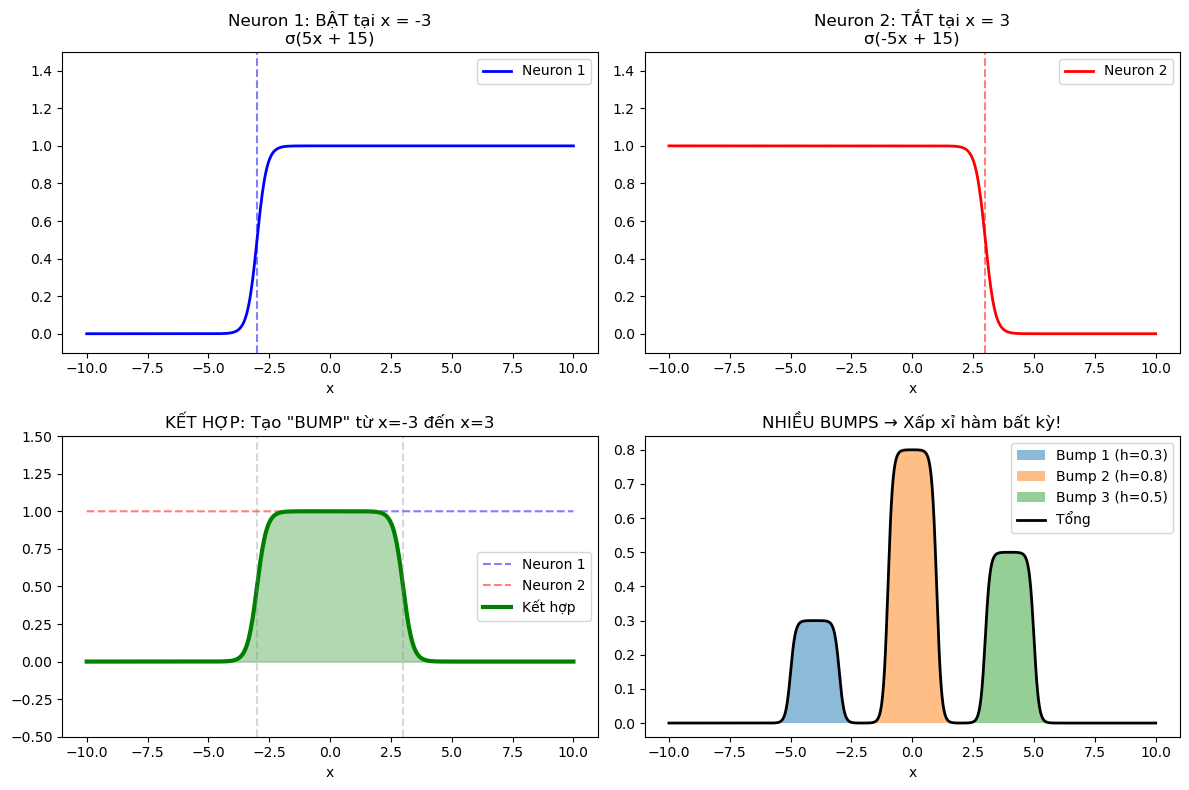


┌─────────────────────────────────────────────────────────────┐
│                    NGUYÊN LÝ CƠ BẢN                         │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  2 neurons → 1 bump (hình chữ nhật)                        │
│  4 neurons → 2 bumps                                        │
│  2n neurons → n bumps                                       │
│                                                             │
│  → Với đủ nhiều bumps, ta xấp xỉ được MỌI ĐƯỜNG CONG!      │
│                                                             │
│  Giống như cách ta xếp các khối LEGO để tạo hình bất kỳ    │
│                                                             │
└─────────────────────────────────────────────────────────────┘



In [3]:
# ============================================================
# PHẦN 2: HAI NEURONS TẠO RA "BUMP" (HÌNH CHỮ NHẬT)
# ============================================================

x = np.linspace(-10, 10, 500)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Neuron 1: Bật tại x = -3 (sigmoid đi lên)
w1, b1 = 5, 15  # sigmoid(5x + 15) → tâm tại x = -3
neuron1 = sigmoid(w1 * x + b1)

# Neuron 2: Tắt tại x = 3 (sigmoid đi xuống = 1 - sigmoid đi lên)
w2, b2 = -5, 15  # sigmoid(-5x + 15) → tâm tại x = 3
neuron2 = sigmoid(w2 * x + b2)

# Vẽ từng neuron
axes[0, 0].plot(x, neuron1, 'b-', linewidth=2, label='Neuron 1')
axes[0, 0].axvline(x=-3, color='blue', linestyle='--', alpha=0.5)
axes[0, 0].set_title('Neuron 1: BẬT tại x = -3\nσ(5x + 15)')
axes[0, 0].set_xlabel('x')
axes[0, 0].legend()
axes[0, 0].set_ylim(-0.1, 1.5)

axes[0, 1].plot(x, neuron2, 'r-', linewidth=2, label='Neuron 2')
axes[0, 1].axvline(x=3, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Neuron 2: TẮT tại x = 3\nσ(-5x + 15)')
axes[0, 1].set_xlabel('x')
axes[0, 1].legend()
axes[0, 1].set_ylim(-0.1, 1.5)

# Kết hợp 2 neurons
bump = neuron1 + neuron2 - 1  # Trừ 1 để normalize
axes[1, 0].plot(x, neuron1, 'b--', alpha=0.5, label='Neuron 1')
axes[1, 0].plot(x, neuron2, 'r--', alpha=0.5, label='Neuron 2')
axes[1, 0].plot(x, bump, 'g-', linewidth=3, label='Kết hợp')
axes[1, 0].axvline(x=-3, color='gray', linestyle='--', alpha=0.3)
axes[1, 0].axvline(x=3, color='gray', linestyle='--', alpha=0.3)
axes[1, 0].fill_between(x, 0, np.maximum(bump, 0), alpha=0.3, color='green')
axes[1, 0].set_title('KẾT HỢP: Tạo "BUMP" từ x=-3 đến x=3')
axes[1, 0].set_xlabel('x')
axes[1, 0].legend()
axes[1, 0].set_ylim(-0.5, 1.5)

# Nhiều bumps với chiều cao khác nhau
bump1 = 0.3 * (sigmoid(10*(x+5)) + sigmoid(-10*(x+3)) - 1)
bump2 = 0.8 * (sigmoid(10*(x+1)) + sigmoid(-10*(x-1)) - 1)
bump3 = 0.5 * (sigmoid(10*(x-3)) + sigmoid(-10*(x-5)) - 1)
combined = np.maximum(bump1, 0) + np.maximum(bump2, 0) + np.maximum(bump3, 0)

axes[1, 1].fill_between(x, 0, np.maximum(bump1, 0), alpha=0.5, label='Bump 1 (h=0.3)')
axes[1, 1].fill_between(x, 0, np.maximum(bump2, 0), alpha=0.5, label='Bump 2 (h=0.8)')
axes[1, 1].fill_between(x, 0, np.maximum(bump3, 0), alpha=0.5, label='Bump 3 (h=0.5)')
axes[1, 1].plot(x, combined, 'k-', linewidth=2, label='Tổng')
axes[1, 1].set_title('NHIỀU BUMPS → Xấp xỉ hàm bất kỳ!')
axes[1, 1].set_xlabel('x')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("""
┌─────────────────────────────────────────────────────────────┐
│                    NGUYÊN LÝ CƠ BẢN                         │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  2 neurons → 1 bump (hình chữ nhật)                        │
│  4 neurons → 2 bumps                                        │
│  2n neurons → n bumps                                       │
│                                                             │
│  → Với đủ nhiều bumps, ta xấp xỉ được MỌI ĐƯỜNG CONG!      │
│                                                             │
│  Giống như cách ta xếp các khối LEGO để tạo hình bất kỳ    │
│                                                             │
└─────────────────────────────────────────────────────────────┘
""")

Bất kỳ hàm liên tục nào cũng có thể xấp xỉ bằng
tổng các hình chữ nhật với độ rộng đủ nhỏ!

      ┌───┐
    ┌─┤   ├─┐
  ┌─┤ │   │ ├─┐
┌─┤ │ │   │ │ ├─┐
│ │ │ │   │ │ │ │     ← Các "bumps" xếp chồng
└─┴─┴─┴───┴─┴─┴─┘

→ Càng nhiều bumps, càng mịn, càng chính xác!

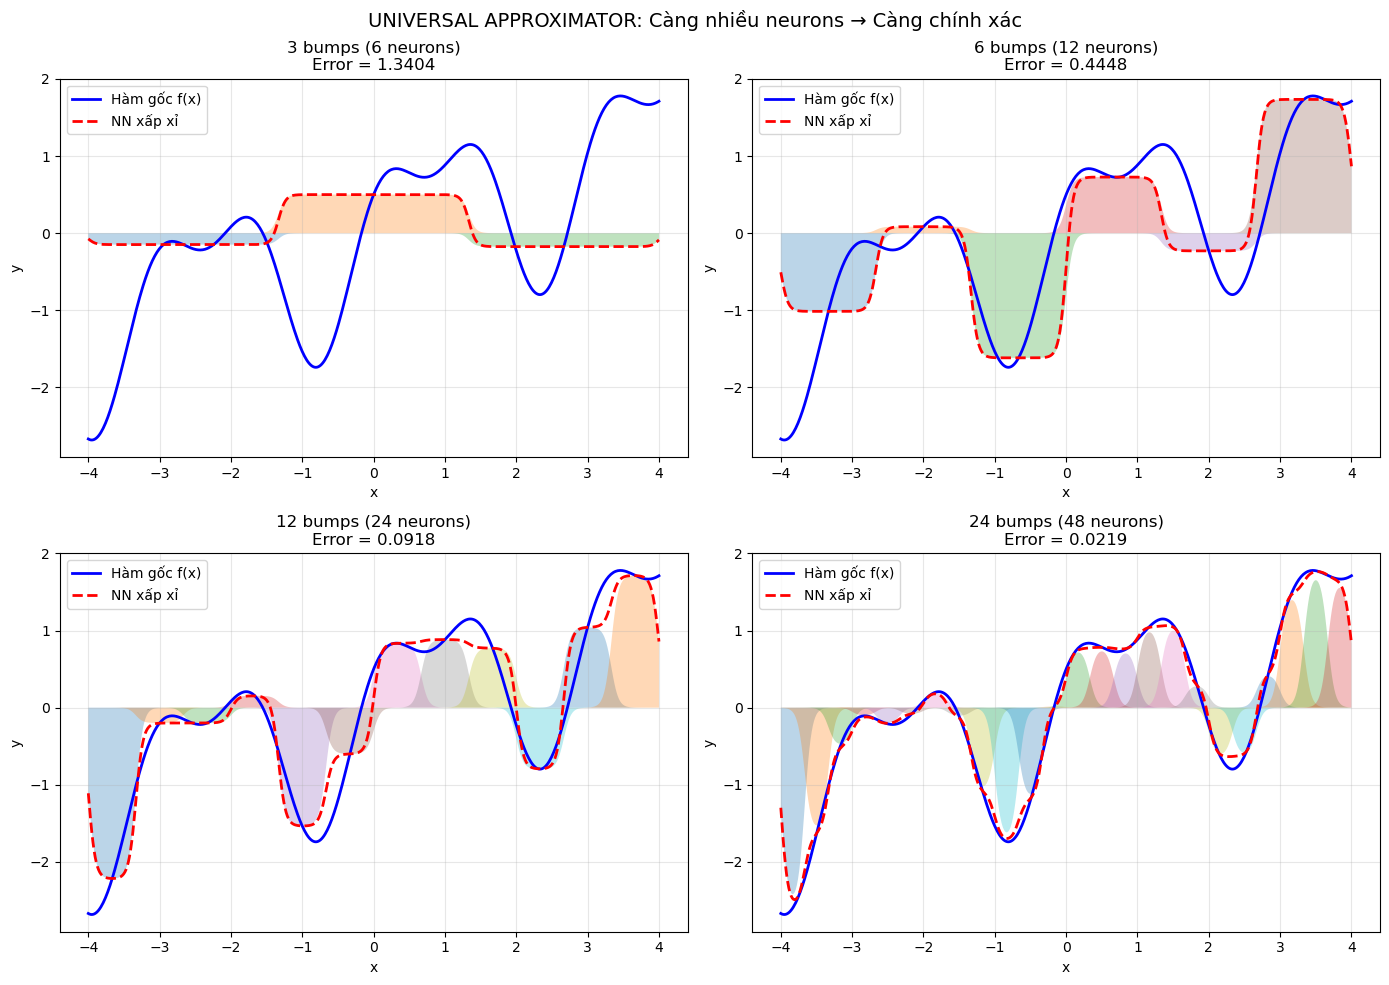

In [4]:
# ============================================================
# PHẦN 3: XẤP XỈ HÀM BẤT KỲ BẰNG NHIỀU BUMPS
# ============================================================

# Hàm mục tiêu phức tạp
def target_function(x):
    return np.sin(2*x) + 0.5*np.cos(4*x) + 0.3*x

x = np.linspace(-4, 4, 500)
y_target = target_function(x)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Số lượng bumps khác nhau
n_bumps_list = [3, 6, 12, 24]

for idx, n_bumps in enumerate(n_bumps_list):
    ax = axes[idx // 2, idx % 2]
    
    # Tạo các bumps
    bump_width = 8 / n_bumps
    centers = np.linspace(-4 + bump_width/2, 4 - bump_width/2, n_bumps)
    
    approximation = np.zeros_like(x)
    
    for center in centers:
        # Mỗi bump = sigmoid lên - sigmoid xuống
        left = center - bump_width/2
        right = center + bump_width/2
        
        # Chiều cao bump = giá trị hàm tại tâm
        height = target_function(center)
        
        # Tạo bump
        bump = height * (sigmoid(20*(x - left)) - sigmoid(20*(x - right)))
        approximation += bump
        
        # Vẽ từng bump nhỏ
        ax.fill_between(x, 0, bump, alpha=0.3)
    
    ax.plot(x, y_target, 'b-', linewidth=2, label='Hàm gốc f(x)')
    ax.plot(x, approximation, 'r--', linewidth=2, label='NN xấp xỉ')
    ax.set_title(f'{n_bumps} bumps ({n_bumps*2} neurons)\nError = {np.mean((y_target - approximation)**2):.4f}')
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)

plt.suptitle('UNIVERSAL APPROXIMATOR: Càng nhiều neurons → Càng chính xác', fontsize=14)
plt.tight_layout()
plt.show()

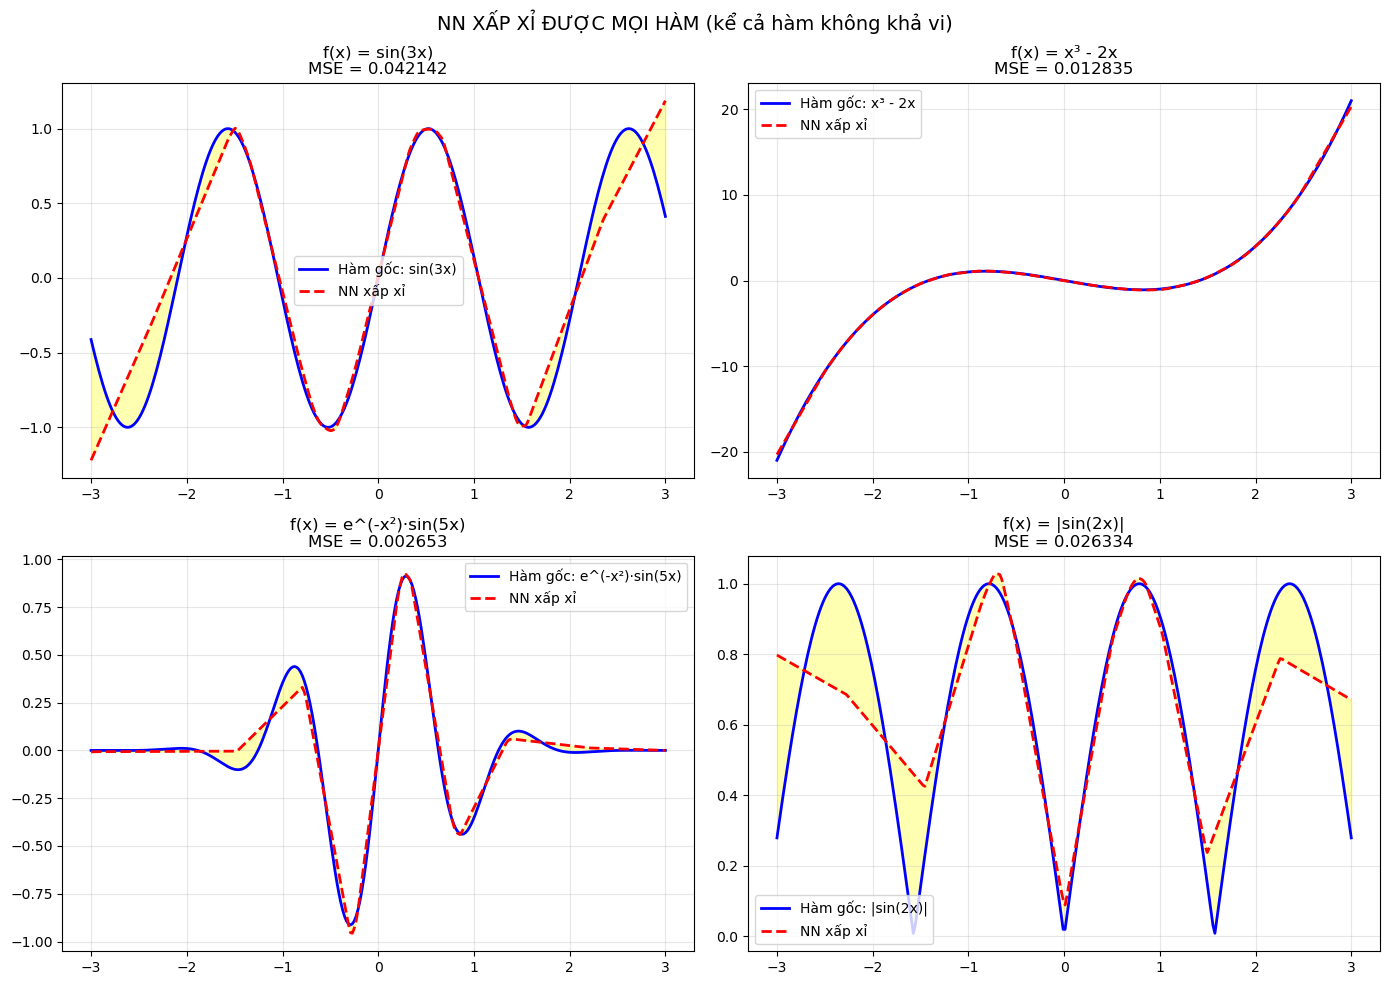


┌─────────────────────────────────────────────────────────────┐
│                    KẾT LUẬN                                  │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Neural Network có thể xấp xỉ:                              │
│  ✅ Hàm sin, cos                                            │
│  ✅ Hàm polynomial                                          │
│  ✅ Hàm mũ                                                  │
│  ✅ Hàm không khả vi (như |x|)                              │
│  ✅ BẤT KỲ hàm liên tục nào!                               │
│                                                             │
│  Điều kiện: Đủ số neurons                                   │
│                                                             │
└─────────────────────────────────────────────────────────────┘



In [5]:
# ============================================================
# PHẦN 4: CHỨNG MINH VỚI NEURAL NETWORK THỰC TẾ
# ============================================================

from sklearn.neural_network import MLPRegressor

# Các hàm phức tạp khác nhau
def func1(x): return np.sin(3*x)                    # Sin
def func2(x): return x**3 - 2*x                     # Polynomial
def func3(x): return np.exp(-x**2) * np.sin(5*x)    # Phức tạp
def func4(x): return np.abs(np.sin(2*x))            # Không khả vi

functions = [
    (func1, "sin(3x)"),
    (func2, "x³ - 2x"),
    (func3, "e^(-x²)·sin(5x)"),
    (func4, "|sin(2x)|")
]

x = np.linspace(-3, 3, 300).reshape(-1, 1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (func, name) in enumerate(functions):
    ax = axes[idx // 2, idx % 2]
    y = func(x.ravel())
    
    # Neural Network với nhiều neurons
    nn = MLPRegressor(
        hidden_layer_sizes=(100, 50),  # 2 layers
        activation='relu',
        max_iter=2000,
        random_state=42
    )
    nn.fit(x, y)
    y_pred = nn.predict(x)
    
    mse = np.mean((y - y_pred)**2)
    
    ax.plot(x, y, 'b-', linewidth=2, label=f'Hàm gốc: {name}')
    ax.plot(x, y_pred, 'r--', linewidth=2, label='NN xấp xỉ')
    ax.fill_between(x.ravel(), y, y_pred, alpha=0.3, color='yellow')
    ax.set_title(f'f(x) = {name}\nMSE = {mse:.6f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('NN XẤP XỈ ĐƯỢC MỌI HÀM (kể cả hàm không khả vi)', fontsize=14)
plt.tight_layout()
plt.show()

print("""
┌─────────────────────────────────────────────────────────────┐
│                    KẾT LUẬN                                  │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Neural Network có thể xấp xỉ:                              │
│  ✅ Hàm sin, cos                                            │
│  ✅ Hàm polynomial                                          │
│  ✅ Hàm mũ                                                  │
│  ✅ Hàm không khả vi (như |x|)                              │
│  ✅ BẤT KỲ hàm liên tục nào!                               │
│                                                             │
│  Điều kiện: Đủ số neurons                                   │
│                                                             │
└─────────────────────────────────────────────────────────────┘
""")

/tmp/ipykernel_584839/1310611895.py:59: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_584839/1310611895.py:59: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/nii/anaconda3/envs/conda_sgu_ml_2025/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nii/anaconda3/envs/conda_sgu_ml_2025/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


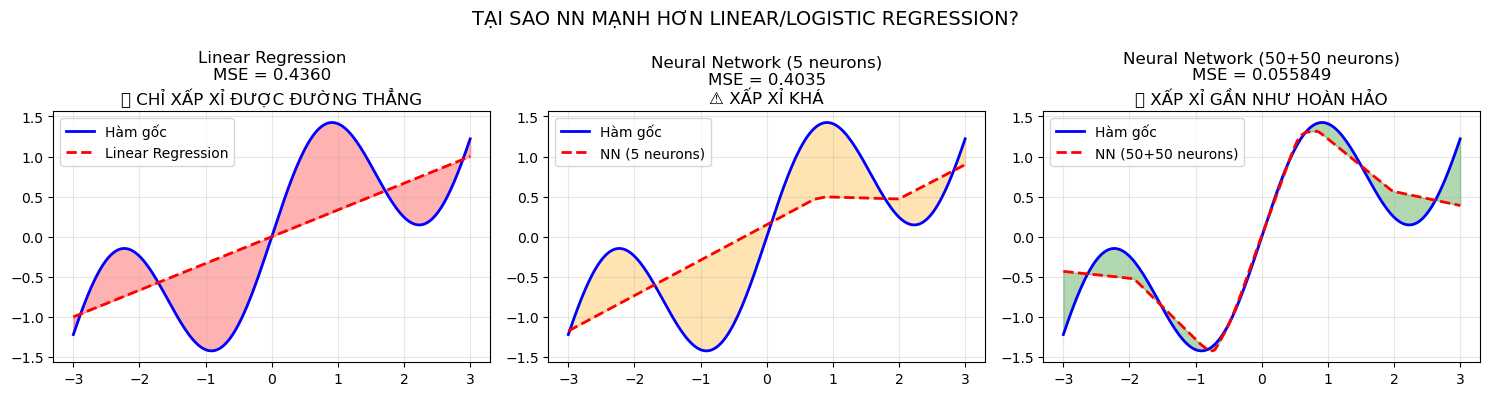


┌─────────────────────────────────────────────────────────────┐
│                    KẾT QUẢ SO SÁNH                          │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Linear Regression:      MSE = 0.4360                │
│  NN (5 neurons):         MSE = 0.4035                │
│  NN (50+50 neurons):     MSE = 0.055849              │
│                                                             │
│  → NN giảm error 8x so với Linear Regression!     │
│                                                             │
└─────────────────────────────────────────────────────────────┘



In [6]:
# ============================================================
# PHẦN 5: SO SÁNH LOGISTIC REGRESSION VS NEURAL NETWORK
# ============================================================

from sklearn.linear_model import LinearRegression

# Hàm phi tuyến
def nonlinear_func(x):
    return np.sin(2*x) + 0.5*x

x = np.linspace(-3, 3, 200).reshape(-1, 1)
y = nonlinear_func(x.ravel())

# 1. Linear Regression (tương đương 0 hidden layer)
lr = LinearRegression()
lr.fit(x, y)
y_lr = lr.predict(x)

# 2. Neural Network - 1 hidden layer, 5 neurons
nn_small = MLPRegressor(hidden_layer_sizes=(5,), max_iter=2000, random_state=42)
nn_small.fit(x, y)
y_nn_small = nn_small.predict(x)

# 3. Neural Network - 2 hidden layers, 50 neurons mỗi layer
nn_large = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=2000, random_state=42)
nn_large.fit(x, y)
y_nn_large = nn_large.predict(x)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Linear Regression
axes[0].plot(x, y, 'b-', linewidth=2, label='Hàm gốc')
axes[0].plot(x, y_lr, 'r--', linewidth=2, label='Linear Regression')
axes[0].fill_between(x.ravel(), y, y_lr, alpha=0.3, color='red')
mse_lr = np.mean((y - y_lr)**2)
axes[0].set_title(f'Linear Regression\nMSE = {mse_lr:.4f}\n❌ CHỈ XẤP XỈ ĐƯỢC ĐƯỜNG THẲNG')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Small NN
axes[1].plot(x, y, 'b-', linewidth=2, label='Hàm gốc')
axes[1].plot(x, y_nn_small, 'r--', linewidth=2, label='NN (5 neurons)')
axes[1].fill_between(x.ravel(), y, y_nn_small, alpha=0.3, color='orange')
mse_small = np.mean((y - y_nn_small)**2)
axes[1].set_title(f'Neural Network (5 neurons)\nMSE = {mse_small:.4f}\n⚠️ XẤP XỈ KHÁ')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Large NN
axes[2].plot(x, y, 'b-', linewidth=2, label='Hàm gốc')
axes[2].plot(x, y_nn_large, 'r--', linewidth=2, label='NN (50+50 neurons)')
axes[2].fill_between(x.ravel(), y, y_nn_large, alpha=0.3, color='green')
mse_large = np.mean((y - y_nn_large)**2)
axes[2].set_title(f'Neural Network (50+50 neurons)\nMSE = {mse_large:.6f}\n✅ XẤP XỈ GẦN NHƯ HOÀN HẢO')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('TẠI SAO NN MẠNH HƠN LINEAR/LOGISTIC REGRESSION?', fontsize=14)
plt.tight_layout()
plt.show()

print(f"""
┌─────────────────────────────────────────────────────────────┐
│                    KẾT QUẢ SO SÁNH                          │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Linear Regression:      MSE = {mse_lr:.4f}                │
│  NN (5 neurons):         MSE = {mse_small:.4f}                │
│  NN (50+50 neurons):     MSE = {mse_large:.6f}              │
│                                                             │
│  → NN giảm error {mse_lr/mse_large:.0f}x so với Linear Regression!     │
│                                                             │
└─────────────────────────────────────────────────────────────┘
""")

┌─────────────────────────────────────────────────────────────┐
│                    BƯỚC 1                                   │
│  Mỗi neuron với sigmoid tạo ra một "bậc thang"             │
│                                                             │
│       ──────┐                                               │
│             │                                               │
│             └──────                                         │
└─────────────────────────────────────────────────────────────┘
                           ↓
┌─────────────────────────────────────────────────────────────┐
│                    BƯỚC 2                                   │
│  2 neurons kết hợp tạo ra một "bump" (hình chữ nhật)       │
│                                                             │
│         ┌─────┐                                             │
│     ────┘     └────                                         │
└─────────────────────────────────────────────────────────────┘
                           ↓
┌─────────────────────────────────────────────────────────────┐
│                    BƯỚC 3                                   │
│  Nhiều bumps với chiều cao khác nhau                       │
│                                                             │
│      ┌─┐ ┌───┐   ┌─────┐                                   │
│    ──┘ └─┘   └───┘     └──                                 │
└─────────────────────────────────────────────────────────────┘
                           ↓
┌─────────────────────────────────────────────────────────────┐
│                    BƯỚC 4                                   │
│  Với đủ nhiều bumps → Xấp xỉ MỌI đường cong!               │
│                                                             │
│         ╭─╮   ╭───╮                                        │
│    ────╯   ╰─╯     ╰────                                   │
│                                                             │
│  Giống như:                                                 │
│  - Xếp LEGO để tạo hình bất kỳ                             │
│  - Tích phân Riemann (xấp xỉ bằng hình chữ nhật)           │
│  - Khai triển Fourier (tổng các sóng sin)                  │
│                                                             │
└─────────────────────────────────────────────────────────────┘